In [2]:
import ROOT as rt


In [5]:
samples = ["bnbnue","bnbnu","extbnb"]
finput = {"bnbnue":"out_bnbnue.root",
         "bnbnu":"out_bnbnu.root",
         "extbnb":"out_extbnb.root"}
froot = {}
trees = {}
for k,f in finput.items():
    f = rt.TFile(f)
    trees[k] = f.Get("kprecoana_event")
    froot[k] = f

In [28]:
# Style settings
rt.gStyle.SetOptStat(0)
sample_colors = {"bnbnue":rt.kRed,
                "bnbnu":rt.kBlue+2,
                "extbnb":rt.kBlack}

bnbnue :  hvtxdist_bnbnue
 entries:  35133
32268
Name: hvtxdist_bnbnue Title:  NbinsX: 100 :  31473.0
bnbnu :  hvtxdist_bnbnu
 entries:  54083
20600
Name: hvtxdist_bnbnu Title:  NbinsX: 100 :  18255.0
extbnb :  hvtxdist_extbnb
 entries:  13102
0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cvtxdist


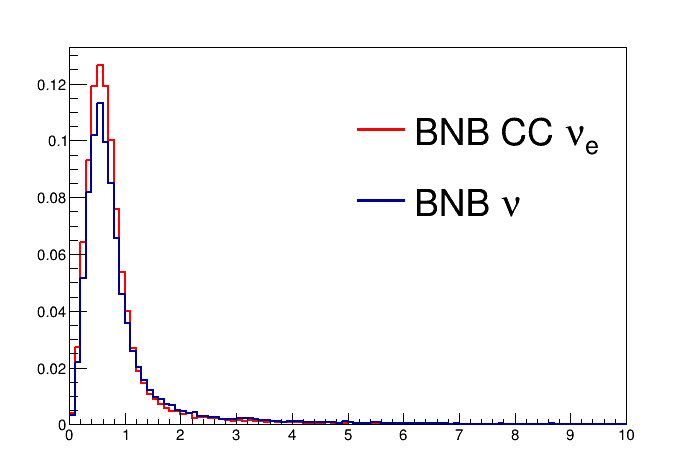

In [57]:
# Plot the distance to true vertex
hvtxdist = {}
for s in samples:
    hname = "hvtxdist_%s"%(s)
    print(s,": ",hname)
    print(" entries: ",trees[s].GetEntries())
    h = rt.TH1D(hname,"",100,0,10)
    n = trees[s].Draw("closest_to_truth_cm>>%s"%(hname),"evis>10.0 && vtx_dwall>5.0")
    print(n)
    if n==0:
        continue
    print(h,": ",h.Integral())
    hvtxdist[s] = h
    h.Scale( 1.0/float(n) )
    h.SetLineColor( sample_colors[s] )
    h.SetLineWidth(2)

tlen_vtxdist = rt.TLegend(0.5,0.5,0.88,0.8)
tlen_vtxdist.SetBorderSize(0)
tlen_vtxdist.AddEntry( hfp_wveto["bnbnue"], "BNB CC #nu_{e}", "L" )
tlen_vtxdist.AddEntry( hfp_wveto["bnbnu"], "BNB #nu", "L" )

cvtxdist = rt.TCanvas("cvtxdist","Distance to Truth")
hvtxdist["bnbnue"].Draw("hist")
hvtxdist["bnbnu"].Draw("histsame")
tlen_vtxdist.Draw()
cvtxdist.Update()
cvtxdist.Draw()


bnbnue :  htp_bnbnue
Name: htp_bnbnue Title:  NbinsX: 10 :  32268.0
bnbnu :  htp_bnbnu
Name: htp_bnbnu Title:  NbinsX: 10 :  20600.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: ctp


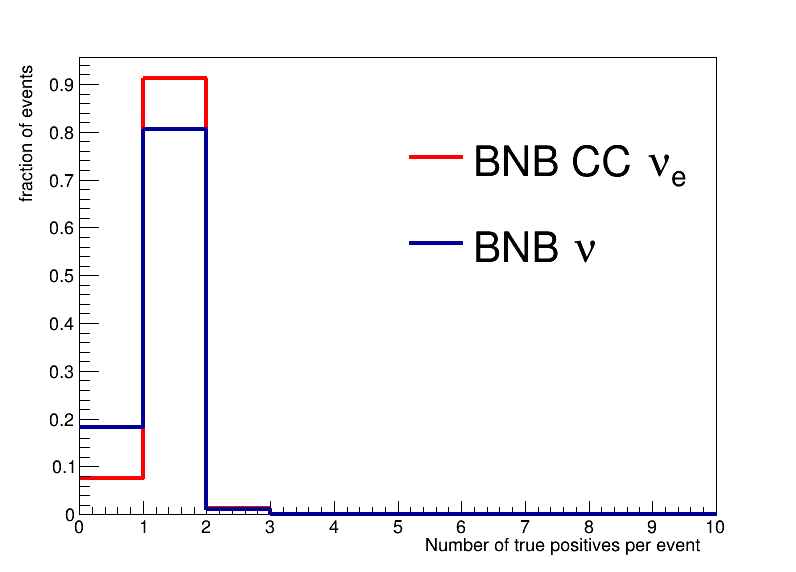

In [60]:
# Plot the number of false positive vertices per event, no wire cell cosmic tagger
htp = {}
for s in ["bnbnue","bnbnu"]:
    hname = "htp_%s"%(s)
    print(s,": ",hname)
    h = rt.TH1D(hname,";Number of true positives per event; fraction of events",10,0,10)
    n = trees[s].Draw("num_nu_tp>>%s"%(hname),"evis>10.0 && vtx_dwall>5.0")
    print(h,": ",h.Integral())
    htp[s] = h
    h.Scale( 1.0/float(n) )
    h.SetLineColor( sample_colors[s] )
    h.SetLineWidth(4)

tlen_ctp = rt.TLegend(0.5,0.5,0.88,0.8)
tlen_ctp.SetBorderSize(0)
tlen_ctp.AddEntry( htp["bnbnue"], "BNB CC #nu_{e}", "L" )
tlen_ctp.AddEntry( htp["bnbnu"], "BNB #nu", "L" )

ctp = rt.TCanvas("ctp","Number of True Positives per events",800,600)
htp["bnbnue"].Draw("hist")
htp["bnbnu"].Draw("histsame")
tlen_ctp.Draw()
ctp.Update()
ctp.Draw()

bnbnue :  hfp_bnbnue
Name: hfp_bnbnue Title:  NbinsX: 10 :  32267.0
bnbnu :  hfp_bnbnu
Name: hfp_bnbnu Title:  NbinsX: 10 :  20600.0
extbnb :  hfp_extbnb
Name: hfp_extbnb Title:  NbinsX: 10 :  13102.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cfp


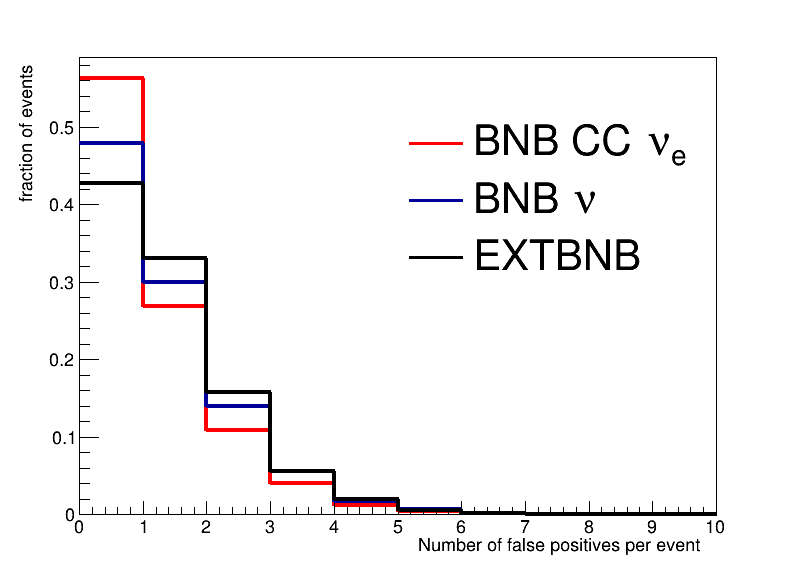

In [56]:
# Plot the number of false positive vertices per event, no wire cell cosmic tagger
hfp = {}
for s in samples:
    hname = "hfp_%s"%(s)
    print(s,": ",hname)
    h = rt.TH1D(hname,";Number of false positives per event; fraction of events",10,0,10)
    if s not in ["extbnb"]:
        n = trees[s].Draw("num_nu_fp>>%s"%(hname),"evis>10.0 && vtx_dwall>5.0")
    else:
        n = trees[s].Draw("num_nu_fp>>%s"%(hname),"")
    print(h,": ",h.Integral())
    hfp[s] = h
    h.Scale( 1.0/float(n) )
    h.SetLineColor( sample_colors[s] )
    h.SetLineWidth(4)

tlen_cfp = rt.TLegend(0.5,0.5,0.88,0.8)
tlen_cfp.SetBorderSize(0)
tlen_cfp.AddEntry( hfp_wveto["bnbnue"], "BNB CC #nu_{e}", "L" )
tlen_cfp.AddEntry( hfp_wveto["bnbnu"], "BNB #nu", "L" )
tlen_cfp.AddEntry( hfp_wveto["extbnb"], "EXTBNB", "L" )

cfp = rt.TCanvas("cfp","Number of False Positives per events",800,600)
hfp["bnbnue"].Draw("hist")
hfp["bnbnu"].Draw("histsame")
hfp["extbnb"].Draw("histsame")
tlen_cfp.Draw()
cfp.Update()
cfp.Draw()

bnbnue :  hfp_wveto_bnbnue
Name: hfp_wveto_bnbnue Title:  NbinsX: 10 :  32268.0
bnbnu :  hfp_wveto_bnbnu
Name: hfp_wveto_bnbnu Title:  NbinsX: 10 :  20600.0
extbnb :  hfp_wveto_extbnb
Name: hfp_wveto_extbnb Title:  NbinsX: 10 :  13102.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: cfp_wveto


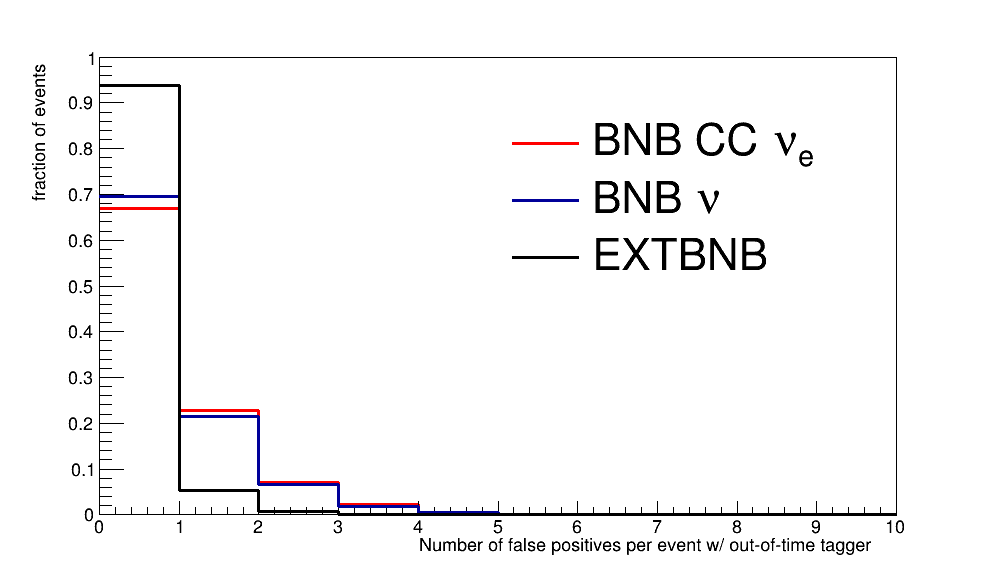

In [52]:
# Plot the number of false positive vertices per event, no wire cell cosmic tagger
hfp_wveto = {}
for s in samples:
    hname = "hfp_wveto_%s"%(s)
    print(s,": ",hname)
    h = rt.TH1D(hname,";Number of false positives per event w/ out-of-time tagger;fraction of events",10,0,10)
    if s not in ["extbnb"]:
        n = trees[s].Draw("num_nu_fp_wcveto>>%s"%(hname),"evis>10.0 && vtx_dwall>5.0")
    else:
        n = trees[s].Draw("num_nu_fp_wcveto>>%s"%(hname),"")
    print(h,": ",h.Integral())
    hfp_wveto[s] = h
    h.Scale( 1.0/float(n) )
    h.SetLineColor( sample_colors[s] )
    h.SetLineWidth(3)

tlen_cfp_wveto = rt.TLegend(0.5,0.5,0.88,0.8)
tlen_cfp_wveto.SetBorderSize(0)
tlen_cfp_wveto.AddEntry( hfp_wveto["bnbnue"], "BNB CC #nu_{e}", "L" )
tlen_cfp_wveto.AddEntry( hfp_wveto["bnbnu"], "BNB #nu", "L" )
tlen_cfp_wveto.AddEntry( hfp_wveto["extbnb"], "EXTBNB", "L" )
    
cfp_wveto = rt.TCanvas("cfp_wveto","Number of False Positives per events, with Veto",1000,600)
hfp_wveto["bnbnue"].Draw("hist")
hfp_wveto["bnbnu"].Draw("histsame")
hfp_wveto["extbnb"].Draw("histsame")
hfp_wveto["bnbnue"].GetYaxis().SetRangeUser(0,1.0)
tlen_cfp_wveto.Draw()
cfp_wveto.Update()
cfp_wveto.Draw()

bnbnue :  htp_wveto_bnbnue
Name: htp_wveto_bnbnue Title:  NbinsX: 10 :  32268.0
bnbnu :  htp_wveto_bnbnu
Name: htp_wveto_bnbnu Title:  NbinsX: 10 :  20600.0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: ctp_wveto


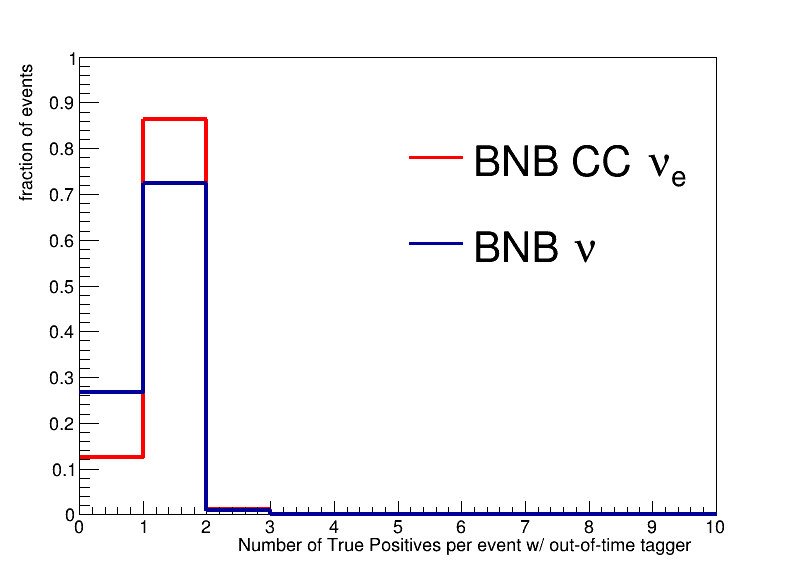

In [54]:
# Plot the number of false positive vertices per event, no wire cell cosmic tagger
htp_wveto = {}
for s in ["bnbnue","bnbnu"]:
    hname = "htp_wveto_%s"%(s)
    print(s,": ",hname)
    h = rt.TH1D(hname,";Number of True Positives per event w/ out-of-time tagger;fraction of events",10,0,10)
    n = trees[s].Draw("num_nu_tp_wcveto>>%s"%(hname),"evis>10.0 && vtx_dwall>5.0")
    print(h,": ",h.Integral())
    htp_wveto[s] = h
    h.Scale( 1.0/float(n) )
    h.SetLineColor( sample_colors[s] )
    h.SetLineWidth(4)

tlen_ctp_wveto = rt.TLegend(0.5,0.5,0.88,0.8)
tlen_ctp_wveto.SetBorderSize(0)
tlen_ctp_wveto.AddEntry( hfp_wveto["bnbnue"], "BNB CC #nu_{e}", "L" )
tlen_ctp_wveto.AddEntry( hfp_wveto["bnbnu"], "BNB #nu", "L" )

ctp_wveto = rt.TCanvas("ctp_wveto","Number of True Positives per events, with Veto",800,600)
htp_wveto["bnbnue"].Draw("hist")
htp_wveto["bnbnu"].Draw("histsame")
htp_wveto["bnbnue"].GetYaxis().SetRangeUser(0,1.0)
tlen_ctp_wveto.Draw()
ctp_wveto.Update()
ctp_wveto.Draw()